In [0]:
#@title
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import folium 
from folium.plugins import HeatMap
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
from datetime import datetime
import math

# Visualizing Cases in India -

In [0]:
confirmed_df = pd.read_csv('COVID19_INDIA_STATEWISE_TIME_SERIES_CONFIRMED.csv')
death_df = pd.read_csv('COVID19_INDIA_STATEWISE_TIME_SERIES_DEATH.csv')
recover_df = pd.read_csv('COVID19_INDIA_STATEWISE_TIME_SERIES_RECOVERY.csv')

In [0]:
confirmed_df.head()

,STATE/UT,CODE,LATITUDE,LONGITUDE,PER CAPITA INCOME (INR),POPULATION,AVERAGE TEMPERATURE (°C),1/30/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,...,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020
0,Andaman and Nicobar Islands,an,11.7401,92.6586,"159,664","419,978",29.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,22,29,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,Andhra Pradesh,ap,15.9129,79.7400,"151,173","52,883,163",31.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,813,893,955,1016,1097,1177,1259,1332,1403,1463,1525,1583,1650,1717,1777,1833,1887,1930,1980,2018,2089,2137,2205,2307,2355,2380,2432,2489,2560,2605,2667,2714,2780,2886,2983,3117,3245,3330,3461,3571
2,Arunachal Pradesh,ar,28.2180,94.7278,"139,588","1,528,296",22.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,4,4
3,Assam,as,26.2006,92.9376,"82,078","34,586,234",23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,36,36,36,36,36,38,38,43,43,43,43,43,45,46,54,60,62,63,65,65,80,87,90,93,101,116,158,189,211,226,347,393,549,683,784,881,1058,1217,1340
4,Bihar,br,25.0961,85.3131,"43,822","119,461,013",26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,143,170,223,251,277,346,366,403,425,466,481,517,528,535,542,550,579,611,707,749,879,953,999,1033,1178,1320,1423,1519,1776,1987,2166,2394,2574,2737,2968,3036,3185,3359,3565,3807


In [0]:
death_df.head()

,STATE/UT,CODE,LATITUDE,LONGITUDE,PER CAPITA INCOME (INR),POPULATION,AVERAGE TEMPERATURE (°C),1/30/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,...,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020
0,Andaman and Nicobar Islands,an,11.7401,92.6586,"159,664","419,978",29.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,ap,15.9129,79.7400,"151,173","52,883,163",31.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,27,29,31,31,31,31,31,31,33,33,33,33,34,36,38,41,44,45,45,46,47,48,48,49,50,50,52,53,54,55,56,56,56,57,58,59,60,60,62
2,Arunachal Pradesh,ar,28.2180,94.7278,"139,588","1,528,296",22.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assam,as,26.2006,92.9376,"82,078","34,586,234",23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,Bihar,br,25.0961,85.3131,"43,822","119,461,013",26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,3,4,4,4,4,4,5,5,5,6,6,6,7,7,7,8,8,9,9,9,9,11,11,11,13,14,15,15,15,21,23


In [0]:
recover_df.head()

,STATE/UT,CODE,LATITUDE,LONGITUDE,PER CAPITA INCOME (INR),POPULATION,AVERAGE TEMPERATURE (°C),1/30/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,...,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020
0,Andaman and Nicobar Islands,an,11.7401,92.6586,"159,664","419,978",29.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,15,15,16,16,26,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,Andhra Pradesh,ap,15.9129,79.7400,"151,173","52,883,163",31.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120,141,145,171,231,235,258,287,321,403,441,488,524,589,729,780,842,887,925,998,1056,1142,1192,1252,1353,1456,1552,1621,1664,1705,1731,1779,1841,1892,2017,2065,2133,2234,2289,2340
2,Arunachal Pradesh,ar,28.2180,94.7278,"139,588","1,528,296",22.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Assam,as,26.2006,92.9376,"82,078","34,586,234",23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,27,27,27,29,29,33,33,33,33,33,35,35,35,35,35,40,40,40,40,41,41,42,42,42,49,55,55,57,58,63,63,88,104,126,164,186
4,Bihar,br,25.0961,85.3131,"43,822","119,461,013",26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,44,44,45,56,56,64,64,84,98,117,124,127,158,158,218,267,318,354,377,382,400,412,440,473,473,517,517,571,571,629,653,702,733,800,918,1050,1209,1311,1520


In [0]:
date = '5/31/2020'
total_confirmed_cases = confirmed_df.loc[38, date]
total_death_cases = death_df.loc[38, date]
total_recover_cases = recover_df.loc[38, date]
total_active_cases = total_confirmed_cases - total_death_cases - total_recover_cases

In [0]:
fig = go.Figure(data=[go.Pie(labels=['Active Cases','Cured','Death'],
                             values= [total_active_cases,total_recover_cases,total_death_cases], pull=[0.15, 0.15, 0.15])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=12,marker=dict(colors=['#09c5f2', '#09f259', '#f23209'], line=dict(color='#FFFFFF', width=3)))
fig.update_layout(
    title_text="Current Situation in India till 31/05/2020")
fig.show()

In [0]:
recent_df = confirmed_df.loc[: , ["STATE/UT", date]]
recent_df = recent_df[ :-1]
recent_df = recent_df.sort_values(by=[date], ascending=False)
fig = px.bar(recent_df, y="STATE/UT", x=date, color="STATE/UT", labels={'31/05/2020':'No of cases'}, height=800, orientation='h')
fig.update_layout(title='Total Number of Confirmed Cases in India Till 31st May')
fig.show()

In [0]:
dead_df = death_df.loc[: , ["STATE/UT", date]]
dead_df = dead_df[ :-1]
dead_df = dead_df.sort_values(by=[date], ascending=False)
fig = px.bar(dead_df, y="STATE/UT", x=date, color="STATE/UT", labels={'31/05/2020':'No of cases'}, height=800, orientation='h')
fig.update_layout(title='Total Number of Death Cases in India Till 31st May')
fig.show()

In [0]:
cured_df = recover_df.loc[: , ["STATE/UT", date]]
cured_df = cured_df[ :-1]
cured_df = cured_df.sort_values(by=[date], ascending=False)
fig = px.bar(cured_df, y="STATE/UT", x=date, color="STATE/UT", labels={'31/05/2020':'No of cases'}, height=800, orientation='h')
fig.update_layout(title='Total Number of Recovered Cases in India Till 31st May')
fig.show()

In [0]:
fig = go.Figure(data=[go.Pie(labels=recent_df["STATE/UT"],
                             values= recent_df[date], hole=.3, pull= .2)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15)
fig.update_traces(textposition='inside')
fig.update_layout(
    title_text="Percentage of Confirmed cases across India")
fig.show()

In [0]:
fig = go.Figure(data=[go.Pie(labels=dead_df["STATE/UT"],
                             values= dead_df[date], hole=.3, pull= .2)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15)
fig.update_traces(textposition='inside')
fig.update_layout(
    title_text="Percentage of Death cases across India")
fig.show()

In [0]:
fig = go.Figure(data=[go.Pie(labels=cured_df["STATE/UT"],
                             values= cured_df[date], hole=.3, pull= .2)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15)
fig.update_traces(textposition='inside')
fig.update_layout(
    title_text="Percentage of Recovered cases across India")
fig.show()

In [0]:
total_confirm = confirmed_df[38:]
total_confirm = total_confirm.drop(['STATE/UT', 'CODE', 'LATITUDE', 'LONGITUDE', 'PER CAPITA INCOME (INR)', 'POPULATION', 'AVERAGE TEMPERATURE (°C)'], axis=1)

total_death = death_df[38:]
total_death = total_death.drop(['STATE/UT', 'CODE', 'LATITUDE', 'LONGITUDE', 'PER CAPITA INCOME (INR) ',
       'POPULATION', 'AVERAGE TEMPERATURE (°C)'], axis=1)

total_recover = recover_df[38:]
total_recover = total_recover.drop(['STATE/UT', 'CODE', 'LATITUDE', 'LONGITUDE', 'PER CAPITA INCOME (INR)', 'POPULATION', 'AVERAGE TEMPERATURE (°C)'], axis=1)

total_active = total_confirm - total_death - total_recover

fig = go.Figure(data=[
    go.Bar(name='Death Cases', x=list(total_death.columns), y=list(total_death.iloc[0]), marker_color='#f20909'),
    go.Bar(name='Recovered Cases', x=list(total_recover.columns), y=list(total_recover.iloc[0]), marker_color='#1df209'),
    go.Bar(name='Active Cases', x=list(total_active.columns), y=list(total_active.iloc[0]), marker_color='#f2852e')
])
# Change the bar mode
fig.update_layout(barmode='stack')
# fig.update_layout(uniformtext_minsize=12)
fig.update_layout(title_text='Cases of Covid-19 in India in last 4 months')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [0]:
total_confirm = confirmed_df[38:]
total_confirm = total_confirm.drop(['STATE/UT', 'CODE', 'LATITUDE', 'LONGITUDE', 'PER CAPITA INCOME (INR)', 'POPULATION', 'AVERAGE TEMPERATURE (°C)'], axis=1)
total_confirm = total_confirm.to_dict(orient='records')
total_confirm = total_confirm[0]
total_confirm_list = []
for key, value in total_confirm.items():
    temp = [key,value]
    total_confirm_list.append(temp)

new_list = []
new_list.append(total_confirm_list[0])
for x in range(1, len(total_confirm_list)):
  val = total_confirm_list[x][1] - total_confirm_list[x-1][1]
  new_list.append([total_confirm_list[x][0], val])

new_dict = [{}]
for x in new_list:
  key = x[0]
  value = x[1]
  new_dict[0][key] = value

confirm_case_daily = pd.DataFrame.from_dict(new_dict)

total_death = death_df[38:]
total_death = total_death.drop(['STATE/UT', 'CODE', 'LATITUDE', 'LONGITUDE', 'PER CAPITA INCOME (INR) ', 'POPULATION', 'AVERAGE TEMPERATURE (°C)'], axis=1)
total_death = total_death.to_dict(orient='records')
total_death = total_death[0]
total_death_list = []
for key, value in total_death.items():
    temp = [key,value]
    total_death_list.append(temp)

new_list = []
new_list.append(total_death_list[0])
for x in range(1, len(total_death_list)):
  val = total_death_list[x][1] - total_death_list[x-1][1]
  new_list.append([total_death_list[x][0], val])

new_dict = [{}]
for x in new_list:
  key = x[0]
  value = x[1]
  new_dict[0][key] = value

death_case_daily = pd.DataFrame.from_dict(new_dict)

total_recover = recover_df[38:]
total_recover = total_recover.drop(['STATE/UT', 'CODE', 'LATITUDE', 'LONGITUDE', 'PER CAPITA INCOME (INR)', 'POPULATION', 'AVERAGE TEMPERATURE (°C)'], axis=1)
total_recover = total_recover.to_dict(orient='records')
total_recover = total_recover[0]
total_recover_list = []
for key, value in total_recover.items():
    temp = [key,value]
    total_recover_list.append(temp)

new_list = []
new_list.append(total_recover_list[0])
for x in range(1, len(total_recover_list)):
  val = total_recover_list[x][1] - total_recover_list[x-1][1]
  new_list.append([total_recover_list[x][0], val])

new_dict = [{}]
for x in new_list:
  key = x[0]
  value = x[1]
  new_dict[0][key] = value

recovered_case_daily = pd.DataFrame.from_dict(new_dict)

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=death_case_daily.columns, y=death_case_daily.iloc[0], name="Death", line=dict(color="#f20909")))
fig.add_trace(go.Scatter(x=recovered_case_daily.columns, y=recovered_case_daily.iloc[0], name="Recovered" ,line=dict(color="#1df209")))
fig.add_trace(go.Scatter(x=confirm_case_daily.columns, y=confirm_case_daily.iloc[0], name="Confirmed", line=dict(color="#f2852e")))
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_layout(title='Covid-19 Confirmed, Death and Recovered cases in India on daily basis.',
                   xaxis_title='Date',
                   yaxis_title='Daily Count')
fig.show()

In [0]:
data = confirmed_df.loc[0:37, ['STATE/UT', date]]
data.columns = ['STATE/UT','confirmed']
data = pd.concat([data, death_df.loc[0:37, date]], axis=1)
data.columns = ['STATE/UT','confirmed', "death"]
value = data
def f(x):
  if x[2] == 0:
    val = 0
  else:    
    val = x[2] / x[1] * 1000
  return val

data = pd.concat([data, value.apply(f, axis=1)], axis=1)
data.columns = ['STATE/UT','confirmed', "death", "Mortality Rate"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['STATE/UT'], y=data['Mortality Rate'],mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Mortality Rate across India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [0]:
data = confirmed_df.loc[0:37, ['STATE/UT', date]]
data.columns = ['STATE/UT','confirmed']
data = pd.concat([data, recover_df.loc[0:37, date]], axis=1)
data.columns = ['STATE/UT','confirmed', "recover"]
value = data
def f(x):
  if x[2] == 0:
    val = 0
  else:    
    val = x[2] / x[1] * 100
  return val

data = pd.concat([data, value.apply(f, axis=1)], axis=1)
data.columns = ['STATE/UT','confirmed', "recover", "Recovery Rate"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['STATE/UT'], y=data['Recovery Rate'],mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Recovery Rate across India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [0]:
map_data = confirmed_df[['LATITUDE', 'LONGITUDE', date]]
map_data = map_data[0:38]
affected_area = folium.Map(location=[20.5937, 78.9629], width='50', height='75', zoom_start=5, max_zoom=8, min_zoom=5, tiles = "Stamen Terrain")
HeatMap(data=map_data.groupby(['LATITUDE','LONGITUDE']).sum().reset_index().values.tolist(),
        radius=30, max_zoom=16).add_to(affected_area)
affected_area

In [0]:
testing_center = pd.read_csv('ICMRTestingLabs.csv')
testing_center.head(10)

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory
5,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001,Anantapur,Andhra Pradesh,Government Laboratory
6,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004,Guntur,Andhra Pradesh,Government Laboratory
7,Rajeev Gandhi Institute of Medical Sciences (R...,"Rajiv Gandhi Institute of Medical Sciences, Ka...",516002,Puttampalli,Andhra Pradesh,Government Laboratory
8,"Andhra Medical College, Vishakhapatnam","Andhra Medical College, Vishakhapatnam, Medica...",530002,Vishakhapatnam,Andhra Pradesh,Government Laboratory
9,"Gauhati Medical College, Guwahati","Guwahati Narakasur Hilltop, Bhangagarh, Guwaha...",781032,Guwahati,Assam,Government Laboratory


In [0]:
import requests
from urllib.parse import quote
location = []
for address in testing_center["city"]:
  try:
    # address = ",".join(address.split(",", 2)[:2])
    address = quote(address)
    r = requests.get(f'https://api.mapbox.com/geocoding/v5/mapbox.places/{address}.json?access_token=pk.eyJ1IjoiNDF4M24iLCJhIjoiY2swdzR5bTk2MDBuZDNubmJmN2RqZDJpeiJ9.o9za41sDfnJVb6Sj7-MSCw&limit=1')
    location.append(r.json()['features'][0]['geometry']['coordinates'])
    continue
  except:
    location.append(float("NaN"))

testing_center["location"] = location 
testing_center

,lab,address,pincode,city,state,type,location
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory,"[92.739763, 11.675716]"
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site,NaN
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory,"[79.499852, 13.6343]"
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory,"[82.21667, 16.93333]"
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory,"[80.61667, 16.51667]"
...,...,...,...,...,...,...,...
262,"Tata Medical Center, Kolkata","Department of Laboratory Sciences, Tata Medica...",700160,Kolkata,West Bengal,Private Laboratory,"[88.33778, 22.54111]"
263,"Laboratory Services, Peerless Hospitex Hospita...","Laboratory Services, Peerless Hospitex Hospita...",700094,Kolkata,West Bengal,Private Laboratory,"[88.33778, 22.54111]"
264,"AMRI Hospitals, Department of Laboratory Medic...","AMRI Hospitals, Department of Laboratory Medic...",700098,Kolkata,West Bengal,Private Laboratory,"[88.33778, 22.54111]"
265,"Suraksha Diagnostics Pvt. Ltd., Kolkata","Suraksha Diagnostics Pvt. Ltd., 12/1, Premises...",700156,Kolkata,West Bengal,Private Laboratory,"[88.33778, 22.54111]"


In [0]:
testing_center = testing_center.dropna()
map = folium.Map(location=[20.5937, 78.9629], width='50', height='75', zoom_start=5, max_zoom=8, min_zoom=5, tiles = "OpenStreetMap")
for address in testing_center["location"]:
  # address = address[::-1]
  # folium.Marker(address).add_to(map)
  try:
    folium.Marker(address).add_to(map)
    continue
  except:
    continue
map

# Predicting New Cases in India -

In [2]:
df = pd.read_csv('owid-covid-data.csv',index_col="location")
df.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
location,,,,,,,,,,,,,,,
Aruba,ABW,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Aruba,ABW,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Aruba,ABW,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Aruba,ABW,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Aruba,ABW,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
india = df.loc["India"]
india.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
location,,,,,,,,,,,,,,,
India,IND,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
India,IND,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
India,IND,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
India,IND,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
India,IND,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [9]:
india_df = india.iloc[1:121, 1:5]
india_df.head()

,date,total_cases,new_cases,total_deaths
location,,,,
India,2020-01-01,0,0,0
India,2020-01-02,0,0,0
India,2020-01-03,0,0,0
India,2020-01-04,0,0,0
India,2020-01-05,0,0,0


In [22]:
india_df.tail()

,date,total_cases,new_cases,total_deaths
location,,,,
India,2020-04-26,26496,1990,824
India,2020-04-27,27892,1396,872
India,2020-04-28,29435,1543,934
India,2020-04-29,31332,1897,1007
India,2020-04-30,33050,1718,1074


In [38]:
india_monthly = india_df.resample('M', on='date')['total_cases','new_cases','total_deaths'].sum()
india_monthly.reset_index(level=0, inplace=True)
india_monthly['month'] = india_monthly['date'].dt.month
india_monthly['month'] = india_monthly['date'].dt.strftime('%B')
india_monthly

,date,total_cases,new_cases,total_deaths,month
0,2020-01-31,2,1,0,January
1,2020-02-29,83,2,0,February
2,2020-03-31,8856,1248,188,March
3,2020-04-30,413410,31799,13055,April


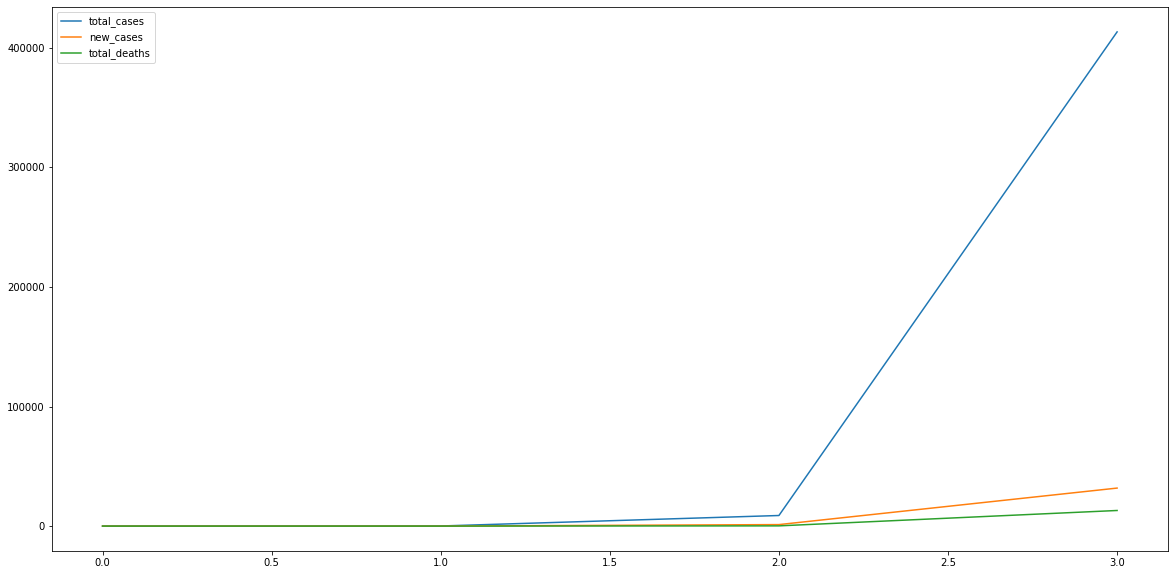

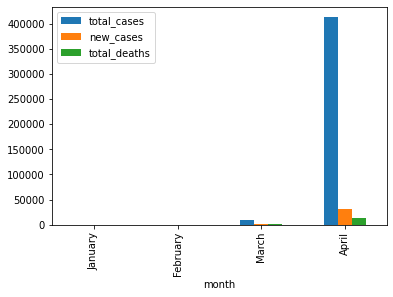

In [39]:
india_monthly = india_monthly.iloc[0:4, 1:5]
india_monthly.plot(figsize = (20,10)) 
india_monthly.plot(x="month", y=["total_cases", "new_cases", "total_deaths"], kind="bar")

In [41]:
# Total Cases precdiction (without lockdown)
d1 = 83
d2 = 8856
w1 = 10
w2 = 990
alpha = 0.2
def TC_prediction():
    
    #weighted average first
    n1 = d1*w1
    n2 = d2*w2
    w_avg = n1+n2
    w_avg = w_avg/1000
    f1 = w_avg
    #forecasting 
    f2 = alpha*n1+(1-alpha)*f1
    f3 = alpha*n2+(1-alpha)*f2
    f3 = int(f3)
    print("Total possible cases in april might have been",f3," if there were no lockdown or social distancing practice in India. ")
TC_prediction()

Total possible cases in april might have been 1759232  if there were no lockdown or social distancing practice in India. 
